In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\malar\OneDrive\Desktop\Water\water_quality_potability.csv")
dup=df.duplicated().sum()
dup

np.int64(0)

In [3]:
print(df.shape)
nul=df.isnull().sum()
print(nul)

(10000, 10)
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


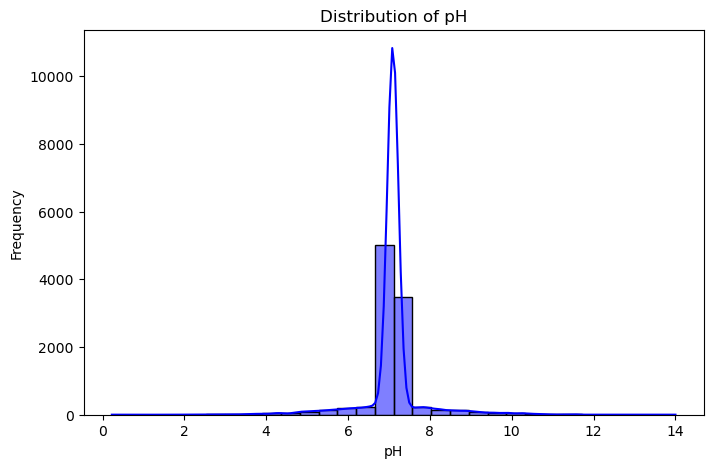

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['ph'], kde=True, bins=30, color="blue")
plt.title("Distribution of pH")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

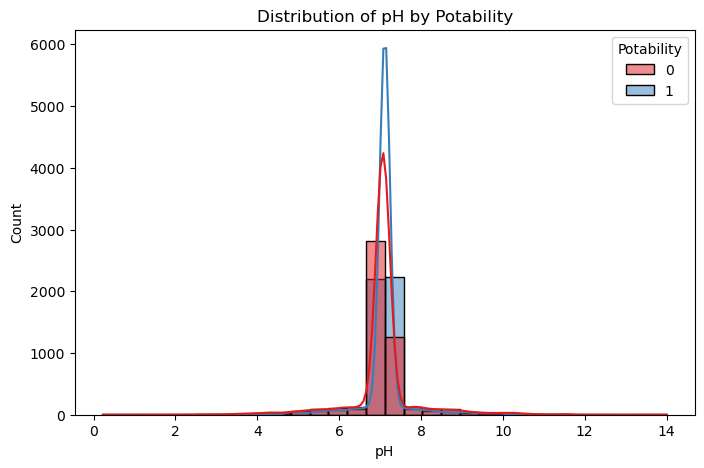

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="ph", hue="Potability", kde=True, bins=30, palette="Set1")
plt.title("Distribution of pH by Potability")
plt.xlabel("pH")
plt.ylabel("Count")
plt.show()

In [ ]:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
        'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']   

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1] 

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)

Accuracy: 0.841
ROC-AUC: 0.9089377217579833


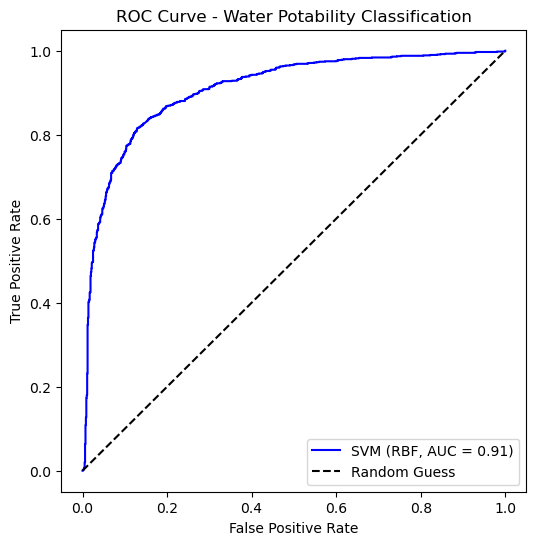

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"SVM (RBF, AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="black", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Water Potability Classification")
plt.legend(loc="lower right")
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r"C:\Users\malar\OneDrive\Desktop\Water\water_quality_potability.csv")

In [10]:
X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
        'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_scores = knn.predict_proba(X_test)[:, 1]  
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)

print("Accuracy:", accuracy)
print("ROC-AUC:", roc_auc)


Accuracy: 0.8335
ROC-AUC: 0.9123268437663755


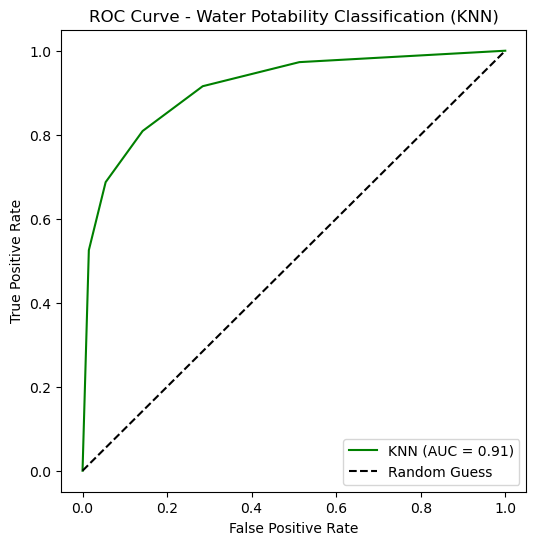

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="green", label=f"KNN (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="black", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Water Potability Classification (KNN)")
plt.legend(loc="lower right")
plt.show()

In [15]:
import pickle

filename = "water_potability_svm.sav"

# Save both model and scaler together as a tuple
with open(filename, "wb") as f:
    pickle.dump((model, scaler), f)

# Load back for testing
with open(filename, "rb") as f:
    loaded_model, loaded_scaler = pickle.load(f)

print("Model and Scaler loaded successfully!")


Model and Scaler loaded successfully!
